1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Class: Dog, Confidence Score: 0.96


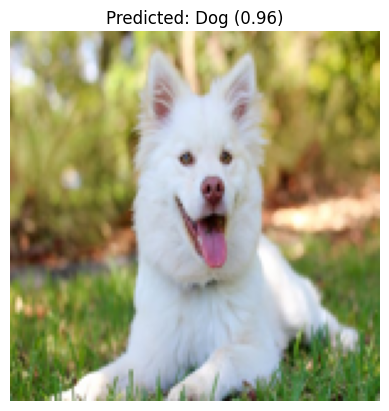

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: Dog, Confidence Score: 0.99


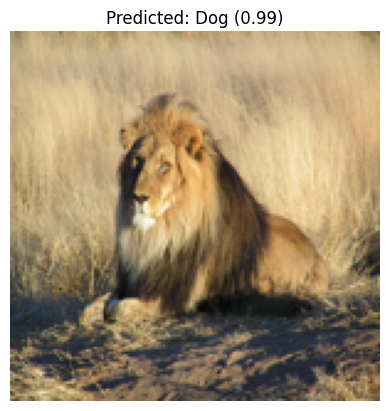

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class: Dog, Confidence Score: 0.79


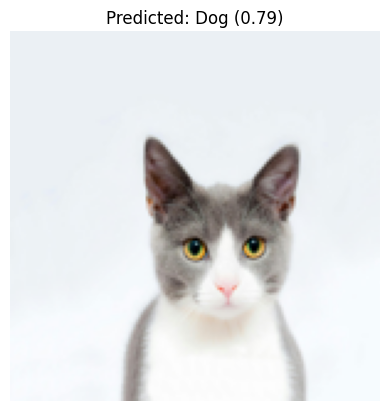

Exiting...


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Load the trained model
model = load_model(r'C:\Users\Saiashish\Desktop\CL-1 lab\cl1_mini_project\animal_classification_model.h5')

# Function to load and preprocess the image from URL
def classify_animal_from_url(img_url, model):
    # Fetch the image from the URL
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    
    # Resize and preprocess the image
    img = img.resize((150, 150))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch
    img_array = img_array / 255.0  # Normalize the image
    
    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)  # Get the index of the highest prediction score

    # Assuming you have 3 classes: 'Cat', 'Dog', 'Wild'
    class_labels = ['Cat', 'Dog', 'Wild']  # Modify according to your classes

    # Get the class label
    predicted_class = class_labels[class_idx]
    confidence_score = prediction[0][class_idx]

    # Output the result
    print(f"Predicted Class: {predicted_class}, Confidence Score: {confidence_score:.2f}")

    # Display the image with the predicted class
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.axis('off')
    plt.show()

# Main loop to input URL and classify until 'q' is pressed
while True:
    img_url = input("Enter image URL or press 'q' to quit: ")
    
    # Break the loop if the user presses 'q'
    if img_url.lower() == 'q':
        print("Exiting...")
        break
    
    # Classify the image from the provided URL
    classify_animal_from_url(img_url, model)
